In [1]:
# Here we take care of paths.

from pathlib import Path
import os
print('Starting path:' + os.getcwd())
if os.getcwd()[-16:] == 'image-to-tex-OCR':
    pass
else:
    PATH = Path().resolve().parents[0]
    os.chdir(PATH)

# make sure you are in Paragraph_to_Tex folder
print('Current path:' + os.getcwd())

Starting path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR/Jupyter_Notebooks
Current path:/Users/gregory/PROJECT_ML/PROJECT_AMINE/image-to-tex-OCR


In [2]:
# Import the Printed_Tex_Data_Module

from Data.Data_Module import Data_Module
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torchvision import transforms
from IPython.display import display, Math

In [14]:
data = Data_Module(stage = 'fit',
                 set_max_label_length = 256,
                 number_png_images_to_use_in_dataset=200*1000,
                 labels_transform='default',
                image_transform_name ='alb',
                 train_val_fraction = 0.95,
                   
                load_vocabulary = False,


                 batch_size = 64,
                num_workers = 10,
                data_on_gpu = False,
                )



# Generates the dataframe from the images and formulas
# images need to be in the folder Data/Data_Bank/generated_png_images
# formulas need to be in Data/Data_Bank/final_png_formulas.txt
# image filenames need to be in Data/Data_Bank/corresponding_png_images.txt
data.prepare_dataframe()

# if one wants to load a vocabulary do not use data.prepare_dataframe(), 
# but instead set load_vocabulary = True


In [15]:
data.df.head(5)

,formula,image_name,height,width,formula_length,latex_tokenized,tokenized_len
0,\widehat { H } = \displaystyle \frac { 2 \pi }...,db69228953de400.png,64,512,289,"[\widehat, {, H, }, =, \displaystyle, \frac, {...",83
1,D _ { \alpha } ^ { i } D ^ { j \alpha } \; w =...,a452f8cc9263922.png,64,512,135,"[D, _, {, \alpha, }, ^, {, i, }, D, ^, {, j, \...",52
2,s h _ { 2 } + \nu = \partial ^ { i } \left( 2 ...,b76614553695957.png,64,512,303,"[s, h, _, {, 2, }, +, \nu, =, \partial, ^, {, ...",104
3,Q _ { 2 n } ( { \bf A } ) = \left\langle { \bf...,56102e6fec5ead8.png,64,512,74,"[Q, _, {, 2, n, }, (, {, \bf, A, }, ), =, \lef...",24
4,Z _ { 2 n } = 1 - \frac { 1 } { n } \ell \delt...,efbd72c272f1c47.png,64,512,199,"[Z, _, {, 2, n, }, =, 1, -, \frac, {, 1, }, {,...",76


In [17]:
print( 
    'Vocabulary size:',len(data.vocabulary),
    '\nMax label length:', data.max_label_length,
    "\nStart <S> goes to index ",data.vocabulary['<S>'],
      "\nEnd <E> goes to index ",data.vocabulary['<E>'],
      "\nPadding <P> goes to index ",data.vocabulary['<P>'],
)

Vocabulary size: 179 
Max label length: 230 
Start <S> goes to index  0 
End <E> goes to index  1 
Padding <P> goes to index  2


In [18]:
# prepeares the dataloaders with transformations and splits train/val
data.setup_data()

# Checking the data 


In [21]:
data.df['image_name'][10]

'ba54c59a51d7f1c.png'

Image is below


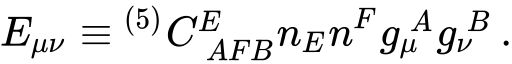

Label:


<IPython.core.display.Math object>

Tex formula: 

E _ { \mu \nu } \equiv { } ^ { ( 5 ) } C _ { ~ A F B } ^ { E } n _ { E } n ^ { F } g _ { \mu } ^ { ~ A } g _ { \nu } ^ { ~ B } \, .


In [28]:
# How to access generated png images 
IMAGE_NAME = data.df['image_name'][10]
image_path= "Data/Data_Bank/generated_png_images/" + IMAGE_NAME
image = Image.open(image_path)#.convert("L")
print('Image is below')
display(image)

# Related Label

image_label_list = data.df[data.df['image_name'] ==  IMAGE_NAME]['formula'].tolist()#.item()
image_label = " ".join(image_label_list)
print('Label:')
display(Math(image_label))
print('Tex formula: \n')
print(data.df[data.df['image_name'] == IMAGE_NAME]['formula'].item())

### Check  vocabulary 

In [30]:
print(data.vocabulary)

{'<S>': 0, '<E>': 1, '<P>': 2, '!': 3, '&': 4, '(': 5, ')': 6, '+': 7, ',': 8, '-': 9, '--': 10, '.': 11, '/': 12, '0': 13, '1': 14, '2': 15, '3': 16, '4': 17, '5': 18, '6': 19, '8': 20, ':': 21, ';': 22, '=': 23, '>': 24, 'A': 25, 'B': 26, 'C': 27, 'D': 28, 'E': 29, 'F': 30, 'G': 31, 'H': 32, 'I': 33, 'K': 34, 'L': 35, 'M': 36, 'N': 37, 'O': 38, 'P': 39, 'Q': 40, 'R': 41, 'S': 42, 'T': 43, 'U': 44, 'V': 45, 'W': 46, 'X': 47, 'Y': 48, 'Z': 49, '[': 50, '\\': 51, '\\,': 52, '\\:': 53, '\\;': 54, '\\Big': 55, '\\Gamma': 56, '\\Lambda': 57, '\\Omega': 58, '\\Phi': 59, '\\\\': 60, '\\aleph': 61, '\\alpha': 62, '\\approx': 63, '\\bar': 64, '\\begin{array}': 65, '\\begin{matrix}': 66, '\\beta': 67, '\\bf': 68, '\\cal': 69, '\\cdot': 70, '\\cdots': 71, '\\cong': 72, '\\dagger': 73, '\\delta': 74, '\\displaystyle': 75, '\\dot': 76, '\\dots': 77, '\\ell': 78, '\\end{array}': 79, '\\end{matrix}': 80, '\\epsilon': 81, '\\equiv': 82, '\\eta': 83, '\\frac': 84, '\\gamma': 85, '\\geq': 86, '\\in': 8

In [32]:
# Can acrtually see the frequncies

data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

,token,id,freq
177,},177,880
175,{,175,880
148,_,148,272
147,^,147,255
15,2,15,123
...,...,...,...
63,\approx,63,1
118,\rbrace,118,1
1,<E>,1,0
2,<P>,2,0


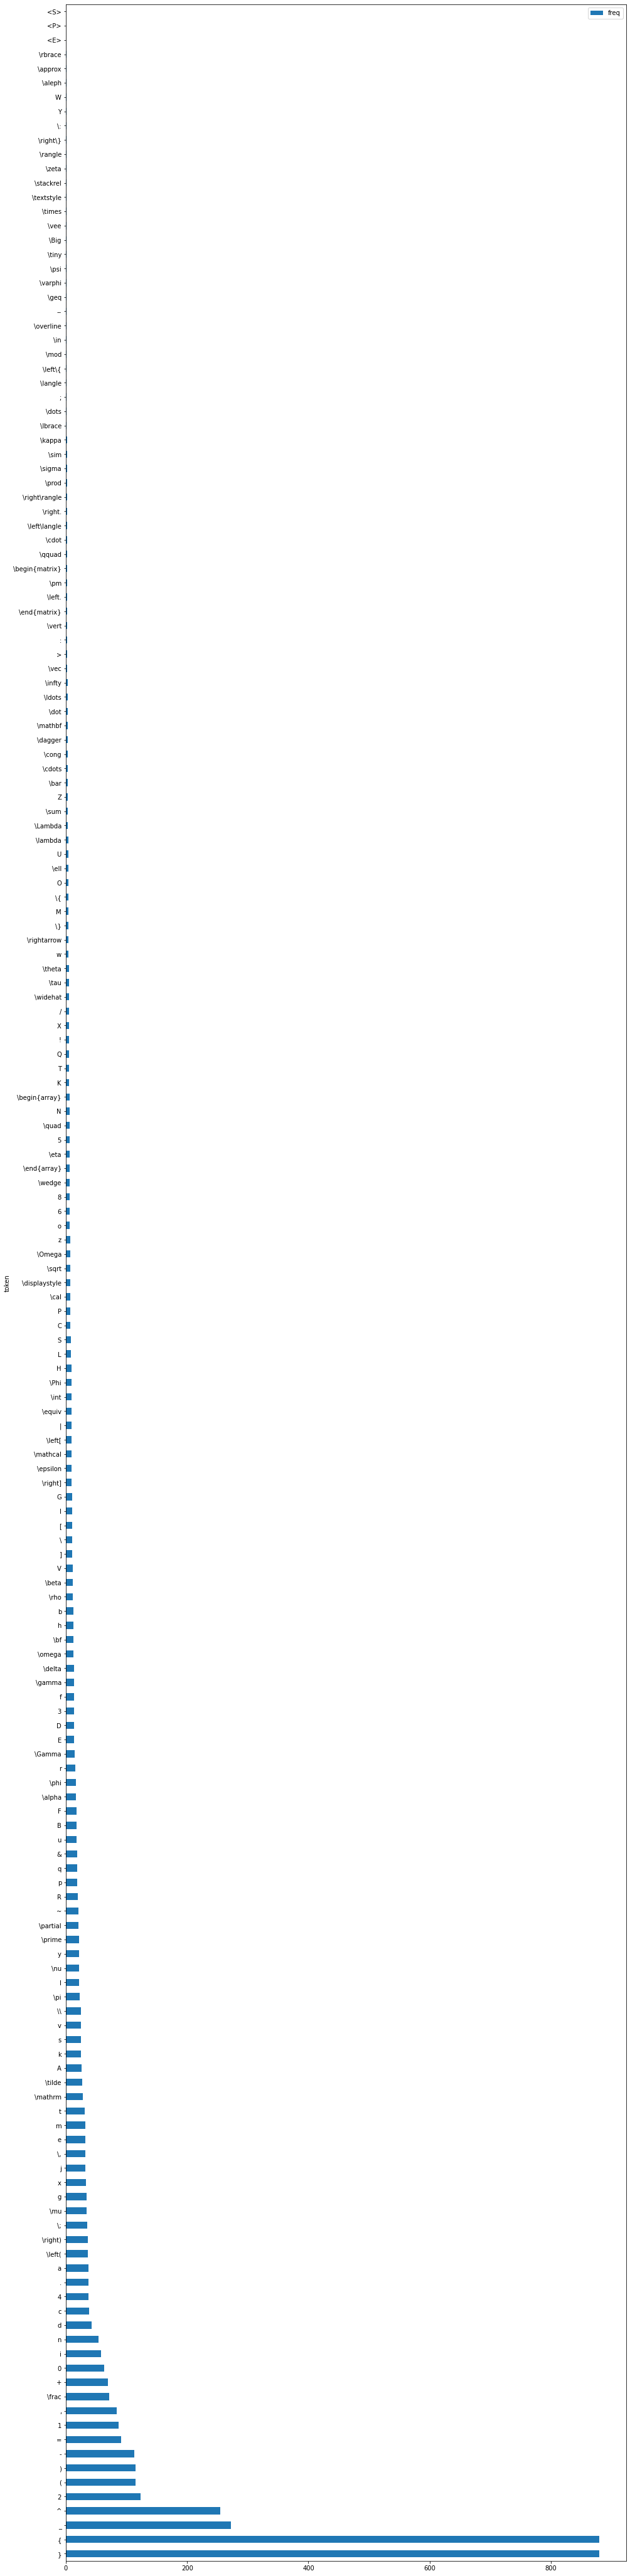

In [36]:
# Plot of vocabulary
import matplotlib.pyplot as plt

# first order the columns by decsending frequncy 
data.data_server.vocabulary_dataframe = data.data_server.vocabulary_dataframe.sort_values("freq", ascending=False)

# next we plot them
data.data_server.vocabulary_dataframe.plot(x="token", y='freq', kind='barh', figsize =(16,75))
plt.show()

#### Look at the distribution of data

In [38]:
# We plot the tokenized len distribution

tokenized_len = data.df['tokenized_len'].value_counts()
tokenized_len

24     4
59     3
69     3
25     2
45     2
44     2
31     2
85     2
126    2
94     1
77     1
60     1
63     1
161    1
228    1
113    1
105    1
75     1
76     1
78     1
93     1
79     1
80     1
82     1
54     1
212    1
104    1
100    1
87     1
83     1
128    1
52     1
51     1
66     1
14     1
145    1
146    1
22     1
26     1
27     1
29     1
30     1
32     1
33     1
34     1
36     1
37     1
38     1
39     1
40     1
42     1
43     1
48     1
129    1
49     1
Name: tokenized_len, dtype: int64

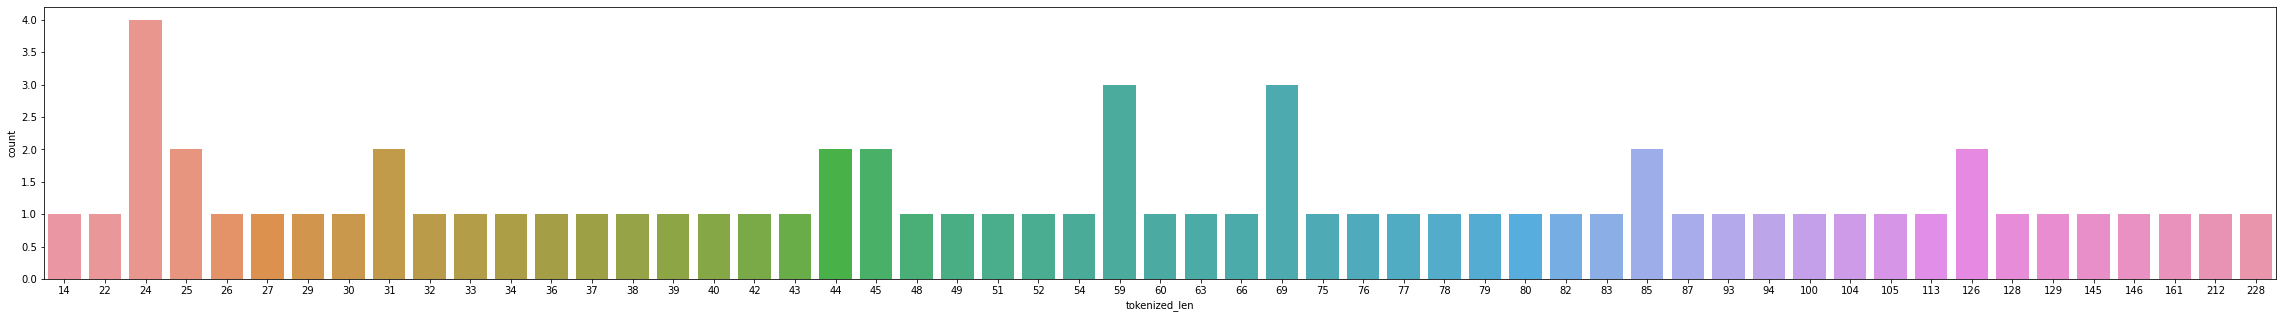

In [39]:
# How long are formulas
plt.figure(figsize=(40,5))
sns.countplot(x=data.df['tokenized_len']);

## Acessing the data

In [47]:
# Helper Function to convert prediction labels to strings
def token_to_strings(tokens):
    mapping = data.vocabulary
    inverse_mapping =data.inverse_vocabulary
    s=''
    if tokens.shape[0] ==1:
        tokens = tokens[0]
    for number in tokens:
        letter = inverse_mapping[number.item()]
        s= s + str(letter)
    return s


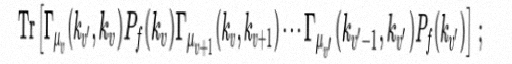

<S>\mathrm{Tr}\left[\Gamma_{\mu_{v}}(k_{v^{\prime}},k_{v})P_{f}(k_{v})\Gamma_{\mu_{v+1}}(k_{v},k_{v+1})\cdots\Gamma_{\mu_{v^{\prime}}}(k_{v^{\prime}-1},k_{v^{\prime}})P_{f}(k_{v^{\prime}})\right]\,;<E><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>


In [49]:
transform = transforms.ToPILImage()
display(transform(data.data_train[1][0]))
print(token_to_strings(data.data_train[1][1]))